# ARIMA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Temp_Data.csv',index_col='DATE',parse_dates=True)
df.head()

,Temp,relative_humidity,wind_speed,Pressure
DATE,,,,
2020-01-01,-0.44,86.0,18.5,100.15
2020-01-02,-0.09,79.0,14.0,100.47
2020-01-03,2.95,82.0,12.0,100.64
2020-01-04,-0.80,86.0,15.0,100.75
2020-01-05,-7.95,74.5,15.0,101.06


In [4]:
df.index.freq='D'
df.dropna(inplace=True)

<AxesSubplot:xlabel='DATE'>

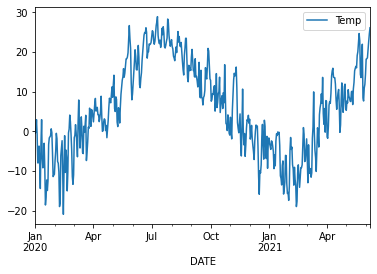

In [5]:
df=pd.DataFrame(df['Temp'])
df.plot()

In [6]:
# Split Dataset into train and test sets
train=df.iloc[:510,0]
test = df.iloc[510:,0]

In [10]:
# decomposition of data

from statsmodels.tsa.seasonal import seasonal_decompose

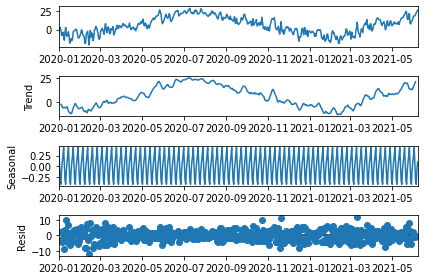

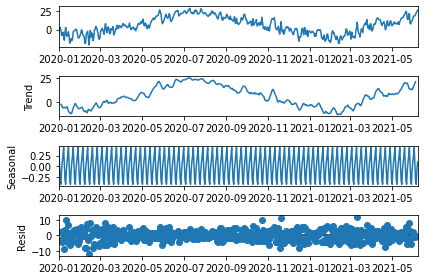

In [13]:
Decomp_results = seasonal_decompose(df)
Decomp_results.plot()

The first plot is the actual data

<AxesSubplot:xlabel='DATE'>

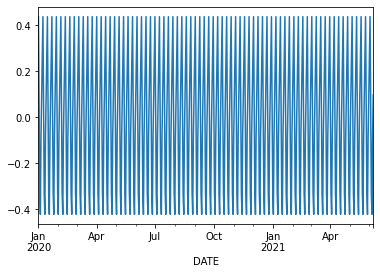

In [14]:
Decomp_results.seasonal.plot()

seasonality inside residual

## Finding the parameters (p,d,q)

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

lags is the number of backshift

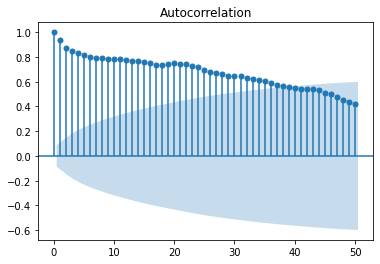

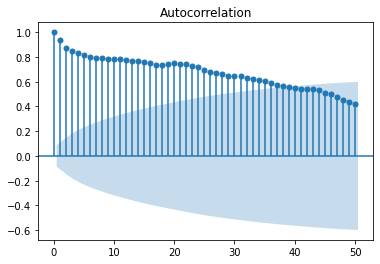

In [18]:
plot_acf(train,lags=50)

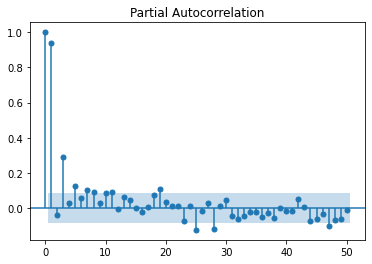

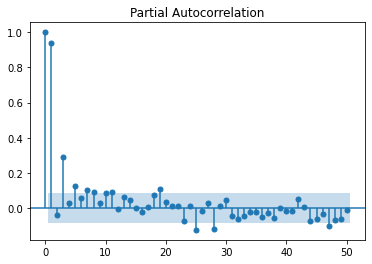

In [19]:
plot_pacf(train,lags=50)

There is gradual reduction in acf and sharp reduction after 2 in pacf plot. p might be between 2 and 3, due to sharp reduction after 2 in pacf plot.

### Using grid search

In [20]:
from pmdarima import auto_arima

In [21]:
help(auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The auto-ARIMA process seeks to identify the most optimal
    parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.
    This process is based on the commonly-used R function,
    ``forecast::auto.arima`` [3].


In [22]:
auto_arima(df,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2846.718, Time=6.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2929.050, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2931.026, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2930.983, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2927.135, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2845.685, Time=1.54 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2856.303, Time=0.76 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2882.045, Time=1.62 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2846.604, Time=2.42 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2848.805, Time=1.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2858.051, Time=1.91 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2848.587, Time=3.59 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2844.520, Time=0.45 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2854.723, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[0]          

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

AIC is the default. It uses minimum AIC is the best model result is ARIMA(1,1,2)(0,0,0) 284. 520. where p=1,d=1,q=2

## Developing ARIMA model

In [23]:
from statsmodels.tsa.arima_model import ARIMA

In [24]:
A_Model=ARIMA(train,order=(1,1,2))
predictor=A_Model.fit()
predictor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Temp   No. Observations:                  509
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1378.373
Method:                       css-mle   S.D. of innovations              3.627
Date:                Tue, 22 Mar 2022   AIC                           2766.745
Time:                        08:03:34   BIC                           2787.908
Sample:                    01-02-2020   HQIC                          2775.043
                         - 05-24-2021                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0394      0.051      0.779      0.436      -0.060       0.139
ar.L1.D.Temp     0.3256      0.082      3.954      0.000       0.164       0.487
ma.L1.D.Temp    -0.3883      0.079     -4.923      0.000      -0.543      -0.234
ma.L2.D.Temp    -0.4014      0.052     -7.730      0.000      -0.503      -0.300
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.0715           +0.0000j            3.0715            0.0000
MA.1            1.1671           +0.0000j            1.1671            0.0000
MA.2           -2.1344           +0.0000j            2.1344            0.5000
-----------------------------------------------------------------------------
"""

In [26]:
#Predict/Evaluate model

predicted_results =predictor.predict(start=len(train),end=len(train)+len(test)-1,typ='levels')

level gives prediction on the original data

**compare**

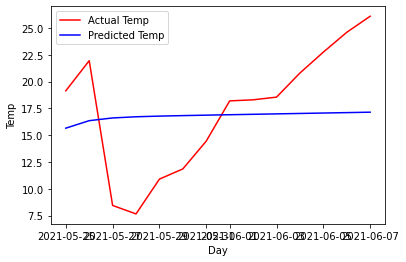

In [28]:
plt.plot(test,color='red',label='Actual Temp')
plt.plot(predicted_results,color='blue',label='Predicted Temp')
plt.xlabel('Day')# because frequency is in days
plt.ylabel('Temp')
plt.legend()
plt.show()

this shows average, the model is not that bad. as ARIMA uses Average.

In [29]:
test.mean()

17.405714285714286

In [30]:
predicted_results.mean()

16.784841727530527

evaluate using RMSE

In [31]:
import math
from sklearn.metrics import mean_squared_error

In [32]:
rmse=math.sqrt(mean_squared_error(test,predicted_results))
rmse

5.646833696571426

# SARIMAX

improve on the model

In [2]:
df=pd.read_csv('Temp_Data.csv',index_col='DATE',parse_dates=True)
df.index.freq='D'
df.dropna(inplace=True)

We need all the columns, lets check the correlation between exogenous variables and target variables.
The higher the correlation of exogenous variables with target variable (-ve or +ve), the better.

<AxesSubplot:>

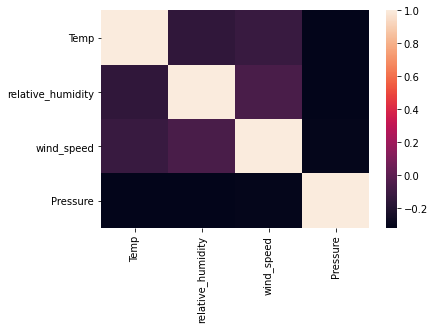

In [3]:
import seaborn as sns

sns.heatmap(df.corr())

In [4]:
train =df.iloc[:510,0] #using the first column
test =df.iloc[510:,0]

define train and test sets for the exogenuous variables

In [7]:
exo =df.iloc[:,1:4]
exo.head()

,relative_humidity,wind_speed,Pressure
DATE,,,
2020-01-01,86.0,18.5,100.15
2020-01-02,79.0,14.0,100.47
2020-01-03,82.0,12.0,100.64
2020-01-04,86.0,15.0,100.75
2020-01-05,74.5,15.0,101.06


separate the exo variables into train and test sets

In [9]:
exo_train=exo.iloc[:510]
exo_test=exo.iloc[510:]

In [10]:
(exo_train.shape,exo_test.shape)

((510, 3), (14, 3))

next find the parameters for SARIMAX 
using auto_arima method to get the 7 parameters. p,d,q,P,D,Q,s

In [11]:
from pmdarima import auto_arima

* define m which is the length of seasonality by visualizing the decomposition of to find m.
* first we define our target variable
* define exogeneous variables

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

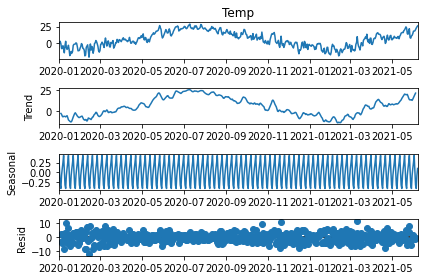

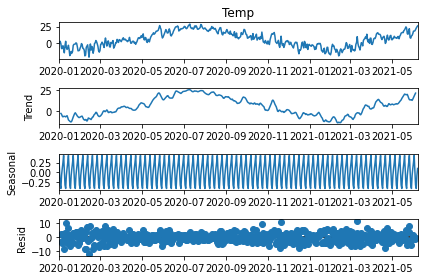

In [14]:
# mention the feature we want to decompose because of several exogenous variables.
Decomp_results=seasonal_decompose(df['Temp'])
Decomp_results.plot()

<AxesSubplot:xlabel='DATE'>

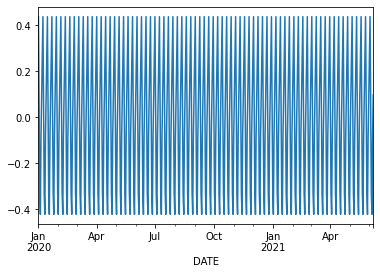

In [15]:
Decomp_results.seasonal.plot()

zoom in and see that and see that 7 days is the seasonality length. 

In [16]:
auto_arima(df['Temp'],exogenous=exo,m=7,trace=True,D=1)# D=1 one differencing for seasonality, remember is in days we are looking at

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[7] intercept   : AIC=2690.783, Time=8.63 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=3398.502, Time=0.27 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=2815.874, Time=2.01 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=2937.327, Time=1.80 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=3398.030, Time=0.59 sec
 ARIMA(2,0,2)(0,1,1)[7] intercept   : AIC=2686.549, Time=5.33 sec
 ARIMA(2,0,2)(0,1,0)[7] intercept   : AIC=2928.865, Time=3.39 sec
 ARIMA(2,0,2)(0,1,2)[7] intercept   : AIC=2691.799, Time=8.61 sec
 ARIMA(2,0,2)(1,1,0)[7] intercept   : AIC=2803.985, Time=3.83 sec
 ARIMA(2,0,2)(1,1,2)[7] intercept   : AIC=inf, Time=10.89 sec
 ARIMA(1,0,2)(0,1,1)[7] intercept   : AIC=inf, Time=5.55 sec
 ARIMA(2,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=5.17 sec
 ARIMA(3,0,2)(0,1,1)[7] intercept   : AIC=inf, Time=8.04 sec
 ARIMA(2,0,3)(0,1,1)[7] intercept   : AIC=inf, Time=6.82 sec
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=2710.013, Time=

ARIMA(order=(2, 0, 2), scoring_args={}, seasonal_order=(0, 1, 1, 7),
      suppress_warnings=True)

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [18]:
model=SARIMAX(train,exog=exo_train,order=(2,0,2),seasonal_order=(0,1,1,7))
model=model.fit()
prediction=model.predict(len(train),len(train)+len(test)-1,exog=exo_test,typ='levels')

C:\Users\aduzo\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\aduzo\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\aduzo\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [21]:
df

,Temp,relative_humidity,wind_speed,Pressure
DATE,,,,
2020-01-01,-0.44,86.0,18.5,100.15
2020-01-02,-0.09,79.0,14.0,100.47
2020-01-03,2.95,82.0,12.0,100.64
2020-01-04,-0.80,86.0,15.0,100.75
2020-01-05,-7.95,74.5,15.0,101.06
...,...,...,...,...
2021-06-03,18.55,83.5,12.0,101.14
2021-06-04,20.80,78.0,18.0,100.85
2021-06-05,22.75,71.5,13.5,100.76


In [19]:
prediction

2021-05-25    16.492522
2021-05-26    19.663836
2021-05-27    16.276112
2021-05-28    14.575043
2021-05-29    14.538977
2021-05-30    13.468511
2021-05-31    14.632252
2021-06-01    15.488390
2021-06-02    15.840822
2021-06-03    17.301910
2021-06-04    17.909535
2021-06-05    18.901682
2021-06-06    17.671108
2021-06-07    17.193186
Freq: D, dtype: float64

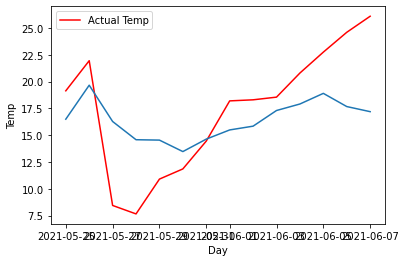

In [22]:
plt.plot(test,color='red',label='Actual Temp')
plt.plot(prediction)
plt.xlabel('Day')
plt.ylabel('Temp')
plt.legend()
plt.show()

It looks better

In [24]:
import math
from sklearn.metrics import mean_squared_error

In [25]:
rmse=math.sqrt(mean_squared_error(test,prediction))
rmse

4.651841655808922

that is much better